In [2]:
import pandas as pd
import numpy as np
from model_hum_corr import *

In [15]:
hum_avg_ratings = np.genfromtxt('avg_hum_ratings.csv',delimiter=',')

In [16]:
caffe = np.genfromtxt('sim.csv',delimiter=',')

In [18]:
hum_sim_mat = np.zeros((18,18))
ind = 0
hum_sim_mat[:] = np.nan
for i in range(18):
    for j in range(i,18):
        if i!=j:
            hum_sim_mat[i,j] = hum_avg_ratings[ind]
            hum_sim_mat[j,i] = hum_avg_ratings[ind]
            ind+=1
        else:
            hum_sim_mat[i,j] = 6
hum_sim_mat_corr = np.reshape(hum_sim_mat,(18*18))
F =np.genfromtxt('sim.csv',delimiter=',')
#F = np.reshape(F, (18,4096))

model_sim = np.dot(F,np.transpose(F))
model_sim_corr =  np.reshape(model_sim, (18*18))


#### correlation of human and model, for 1st half vs last half of the survey

In [56]:
len(hum_sim_mat_corr)/2

162.0

In [57]:
np.corrcoef(hum_sim_mat_corr[0:162],model_sim_corr[0:162])[0,1]**2

0.38988672648606687

In [58]:
np.corrcoef(hum_sim_mat_corr[162:],model_sim_corr[162:])[0,1]**2

0.3111632157219837

### Reading the survey results

In [178]:
survey = pd.read_csv('../survey_results.csv')

In [179]:
survey = survey.drop([2,3,4,5],axis=0)

In [180]:
survey = survey.reset_index()

In [181]:
survey_numbers = survey.loc[2:]

In [182]:
survey_numbers = survey_numbers.reset_index()

In [183]:
survey_numbers.iloc[:,28:-4] = survey_numbers.iloc[:,28:-4].astype('int') 

In [184]:
survey_numbers.iloc[:,28:-4].mean(axis=0)

Q4_1      3.709091
Q4_2      3.509091
Q4_3      1.018182
Q4_4      1.327273
Q4_5      2.363636
            ...   
Q22_9     1.672727
Q22_10    1.509091
Q22_11    4.127273
Q22_12    3.945455
Q22_13    4.290909
Length: 153, dtype: float64

In [155]:
duration = survey_numbers['Duration (in seconds)'].astype('int')

In [185]:
survey_numbers['Duration (in seconds)'] = survey_numbers['Duration (in seconds)'].astype('int')

In [186]:
survey_by_duration = survey_numbers[survey_numbers['Duration (in seconds)']<1800]

In [109]:
duration = [d for d in duration if d<1900]

In [110]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x7f40ae411670>,
 'caps': [<matplotlib.lines.Line2D at 0x7f40ae3e8550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f40ae411850>],
 'medians': [<matplotlib.lines.Line2D at 0x7f40ae3e85e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f40ae3e8970>],
 'means': []}

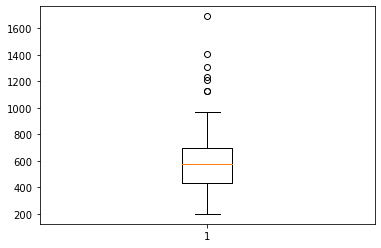

In [111]:
plt.boxplot(duration)

In [187]:
mean_dur = np.mean(survey_by_duration['Duration (in seconds)'])

In [188]:
mean_dur

651.88

In [189]:
survey_by_duration_short = survey_numbers[survey_numbers['Duration (in seconds)']<=mean_dur]

In [190]:
survey_by_duration_long= survey_numbers[survey_numbers['Duration (in seconds)']>mean_dur]

In [191]:
survey_by_duration_long_ratings = survey_by_duration_long.iloc[:,28:-4]

In [192]:
survey_by_duration_short_ratings = survey_by_duration_short.iloc[:,28:-4]

In [193]:
hum_rat_long_avg = survey_by_duration_long_ratings.mean(axis=0)

In [195]:
hum_rat_long_avg

Q4_1      3.409091
Q4_2      3.454545
Q4_3      0.909091
Q4_4      1.454545
Q4_5      2.545455
            ...   
Q22_9     1.909091
Q22_10    1.545455
Q22_11    3.727273
Q22_12    3.363636
Q22_13    3.909091
Length: 153, dtype: float64

In [194]:
len(hum_rat_long_avg)

153

In [196]:
hum_rat_short_avg = survey_by_duration_short_ratings.mean(axis=0)

In [198]:
hum_rat_short_avg

Q4_1      3.909091
Q4_2      3.545455
Q4_3      1.090909
Q4_4      1.242424
Q4_5      2.242424
            ...   
Q22_9     1.515152
Q22_10    1.484848
Q22_11    4.393939
Q22_12    4.333333
Q22_13    4.545455
Length: 153, dtype: float64

In [199]:
hum_sim_mat_long = np.zeros((18,18))
hum_sim_mat_short = np.zeros((18,18))
ind = 0
hum_sim_mat[:] = np.nan
for i in range(18):
    for j in range(i,18):
        if i!=j:
            hum_sim_mat_short[i,j] = hum_rat_short_avg[ind]
            hum_sim_mat_short[j,i] = hum_rat_short_avg[ind]
            hum_sim_mat_long[i,j] = hum_rat_long_avg[ind]
            hum_sim_mat_long[j,i] = hum_rat_long_avg[ind]
            ind+=1
        else:
            hum_sim_mat_short[i,j] = 6
            hum_sim_mat_long[i,j] = 6
hum_sim_mat_corr_long = np.reshape(hum_sim_mat_long,(18*18))
hum_sim_mat_corr_short = np.reshape(hum_sim_mat_short,(18*18))

In [200]:
np.corrcoef(model_sim_corr,hum_sim_mat_corr_long)[0,1]**2

0.3867751107873873

In [201]:
np.corrcoef(model_sim_corr,hum_sim_mat_corr_short)[0,1]**2

0.31757514772831175

In [202]:
np.corrcoef(hum_sim_mat_corr_short,hum_sim_mat_corr_long)[0,1]**2

0.9204892954436124